In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline

In [5]:
df=pd.read_csv('airline_passengers.csv')

In [7]:
df.head(10)

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
5,1949-06,135.0
6,1949-07,148.0
7,1949-08,148.0
8,1949-09,136.0
9,1949-10,119.0


In [8]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [9]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [13]:
df['Month']=pd.to_datetime(df['Month'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [15]:
df.set_index('Month',inplace=True)

In [16]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

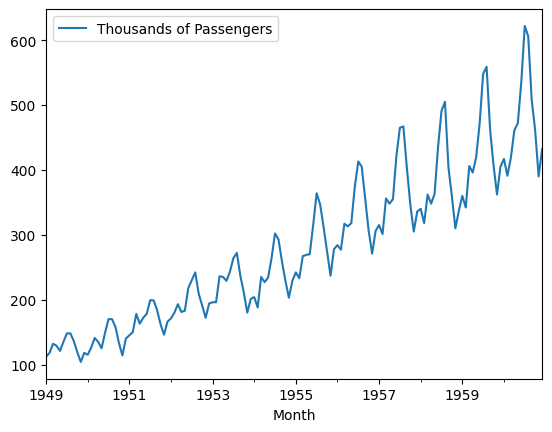

In [17]:
df.plot()

### Dickey Fuller Test

In [18]:
from statsmodels.tsa.stattools import adfuller
# dickey fuller test

In [21]:
def adf_test(series):
    result=adfuller(series)
    print('ADF statistics: {}'.format(result[0]))
    print(f'p-value:{result[1]}')
    if result[1]<=0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

In [22]:
adf_test(df['Thousands of Passengers'])

ADF statistics: 0.8153688792060472
p-value:0.991880243437641
Data is not stationary


### Differencing

In [23]:
df['Passengers First Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [24]:
df.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [25]:
adf_test(df['Passengers First Difference'].dropna())

ADF statistics: -2.8292668241700056
p-value:0.054213290283824704
Data is not stationary


In [26]:
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)

In [27]:
df.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [28]:
adf_test(df['Passengers Second Difference'].dropna())

ADF statistics: -16.384231542468495
p-value:2.7328918500143186e-29
Data is stationary


In [29]:
## 12 months
df['Passengers 12 Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [30]:
df.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [33]:
adf_test(df['Passengers 12 Difference'].dropna())

ADF statistics: -3.383020726492481
p-value:0.011551493085514952
Data is stationary


In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

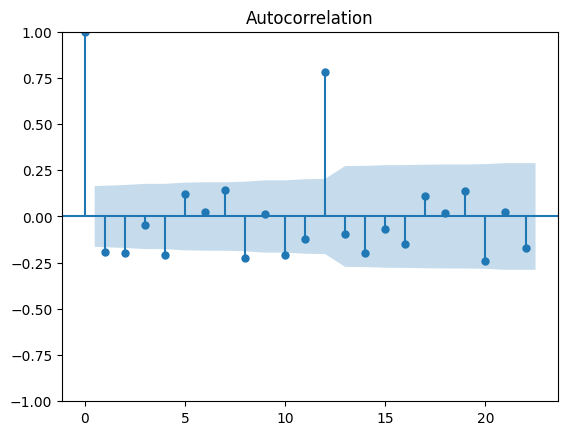

In [32]:
acf=plot_acf(df["Passengers Second Difference"].dropna())
# acf helps in determining q

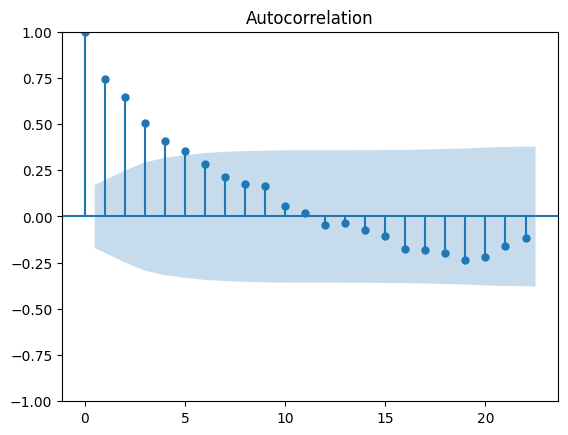

In [35]:
acf=plot_acf(df["Passengers 12 Difference"].dropna())
# acf helps in determining q
#q=5(num over threshold)

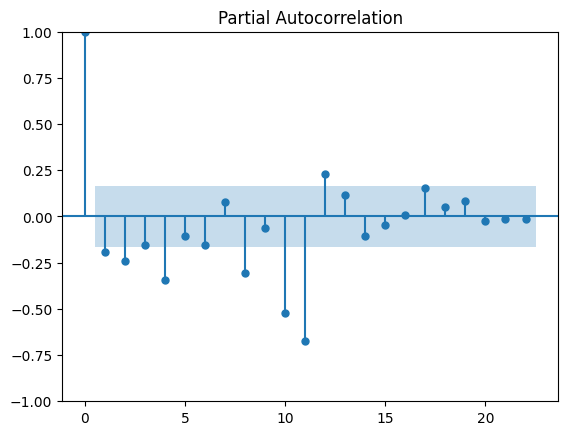

In [34]:
result=plot_pacf(df['Passengers Second Difference'].dropna())

In [36]:
from datetime import datetime,timedelta
train_dataset=datetime(1955,12,1)
test_dataset=datetime(1960,12,1)

In [37]:
train_data=df[:train_dataset]
test_data=df[train_dataset+timedelta(days=1):test_dataset]

In [39]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [40]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [45]:
#Create ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [46]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [47]:
model_arima=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))
                                                                #p  d q

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
model_arima_fit=model_arima.fit()

In [49]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Sun, 27 Aug 2023   AIC                            736.477
Time:                             23:37:55   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
#prediction
pred_start_date=test_data.index[0]
print(pred_start_date)
pred_end_date=test_data.index[-1]
print(pred_end_date)


1956-01-01 00:00:00
1960-12-01 00:00:00


In [52]:
pred=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [56]:
pred

1956-01-01    300.183614
1956-02-01    309.478357
1956-03-01    316.443016
1956-04-01    307.827546
1956-05-01    318.544236
1956-06-01    348.922087
1956-07-01    366.020293
1956-08-01    346.567538
1956-09-01    332.120970
1956-10-01    307.734755
1956-11-01    311.623914
1956-12-01    339.828200
1957-01-01    349.840411
1957-02-01    356.098238
1957-03-01    350.687831
1957-04-01    350.080468
1957-05-01    361.157700
1957-06-01    381.216524
1957-07-01    382.319382
1957-08-01    372.852585
1957-09-01    364.110100
1957-10-01    356.108929
1957-11-01    371.293795
1957-12-01    385.323604
1958-01-01    392.077847
1958-02-01    391.405858
1958-03-01    388.404587
1958-04-01    391.572865
1958-05-01    402.448090
1958-06-01    413.255696
1958-07-01    410.853425
1958-08-01    407.670552
1958-09-01    402.486342
1958-10-01    406.089156
1958-11-01    418.125324
1958-12-01    426.012387
1959-01-01    429.205593
1959-02-01    427.352242
1959-03-01    428.150999
1959-04-01    432.790859


In [53]:
residuals

Month
1956-01-01    -16.183614
1956-02-01    -32.478357
1956-03-01      0.556984
1956-04-01      5.172454
1956-05-01     -0.544236
1956-06-01     25.077913
1956-07-01     46.979707
1956-08-01     58.432462
1956-09-01     22.879030
1956-10-01     -1.734755
1956-11-01    -40.623914
1956-12-01    -33.828200
1957-01-01    -34.840411
1957-02-01    -55.098238
1957-03-01      5.312169
1957-04-01     -2.080468
1957-05-01     -6.157700
1957-06-01     40.783476
1957-07-01     82.680618
1957-08-01     94.147415
1957-09-01     39.889900
1957-10-01     -9.108929
1957-11-01    -66.293795
1957-12-01    -49.323604
1958-01-01    -52.077847
1958-02-01    -73.405858
1958-03-01    -26.404587
1958-04-01    -43.572865
1958-05-01    -39.448090
1958-06-01     21.744304
1958-07-01     80.146575
1958-08-01     97.329448
1958-09-01      1.513658
1958-10-01    -47.089156
1958-11-01   -108.125324
1958-12-01    -89.012387
1959-01-01    -69.205593
1959-02-01    -85.352242
1959-03-01    -22.150999
1959-04-01    -36.7

<Axes: ylabel='Density'>

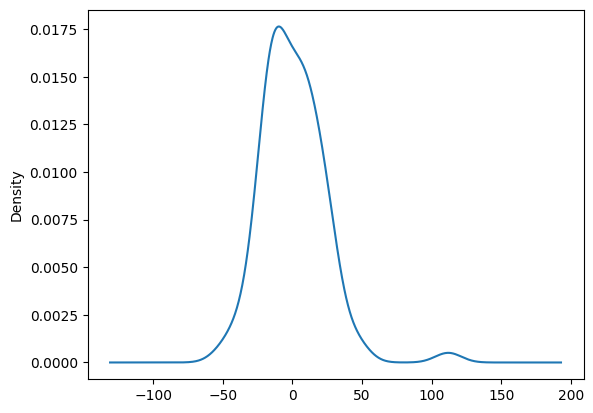

In [54]:
model_arima_fit.resid.plot(kind='kde')

In [55]:
test_data['Predicted_ARIMA']=pred

/var/folders/70/1761clss4h5_2mrwn8yvm5v80000gn/T/ipykernel_8720/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

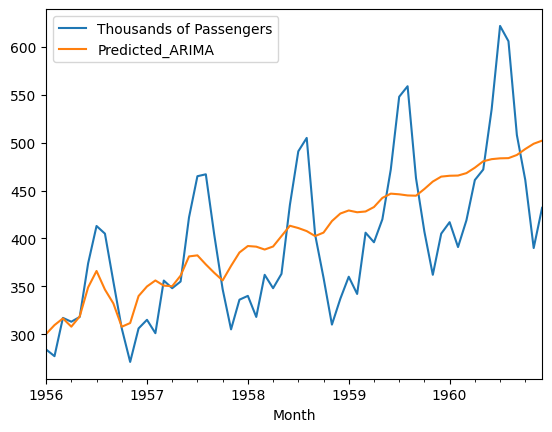

In [57]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

### ARIMA WITH DIFF HYPERPARAMETERS

In [58]:
model_arima_2=ARIMA(train_data['Thousands of Passengers'],order=(3,0,5))
                                                                #p  d q

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
model_arima_fit_2=model_arima_2.fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
model_arima_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(3, 0, 5)   Log Likelihood                -363.418
Date:                     Sun, 27 Aug 2023   AIC                            746.835
Time:                             23:52:04   BIC                            771.143
Sample:                         01-01-1949   HQIC                           756.607
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        197.3526     75.342      2.619      0.009      49.685     345.020
ar.L1          0.4585      0.258      1.776      0.076      -0.047       0.964
ar.L2          0.0136      0.304      0.045      0.964      -0.582       0.609
ar.L3          0.5132      0.182      2.822      0.005       0.157       0.870
ma.L1          0.7537      0.315      2.394      0.017       0.137       1.371
ma.L2          0.4805      0.222      2.162      0.031       0.045       0.916
ma.L3         -0.2390      0.172     -1.390      0.165      -0.576       0.098
ma.L4         -0.7095      0.187     -3.790      0.000      -1.076      -0.343
ma.L5         -0.2180      0.251     -0.870      0.384      -0.709       0.273
sigma2       310.0021     61.922      5.006      0.000     188.638     431.367
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.62
Prob(Q):                              0.79   Prob(JB):                         0.16
Heteroskedasticity (H):               3.94   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
pred_2=model_arima_fit_2.predict(start=pred_start_date,end=pred_end_date)
residuals_2=test_data['Thousands of Passengers']-pred_2

In [62]:
pred_2

1956-01-01    293.282607
1956-02-01    285.040718
1956-03-01    290.873051
1956-04-01    279.971881
1956-05-01    276.879077
1956-06-01    282.939033
1956-07-01    280.080637
1956-08-01    277.265398
1956-09-01    279.045731
1956-10-01    278.356635
1956-11-01    276.620118
1956-12-01    276.728231
1957-01-01    276.400462
1957-02-01    275.360434
1957-03-01    274.934596
1957-04-01    274.556948
1957-05-01    273.844224
1957-06-01    273.293739
1957-07-01    272.837804
1957-08-01    272.255465
1957-09-01    271.699723
1957-10-01    271.202977
1957-11-01    270.668770
1957-12-01    270.131843
1958-01-01    269.623435
1958-02-01    269.108841
1958-03-01    268.590402
1958-04-01    268.084754
1958-05-01    267.581742
1958-06-01    267.078141
1958-07-01    266.580870
1958-08-01    266.087846
1958-09-01    265.596554
1958-10-01    265.109361
1958-11-01    264.626253
1958-12-01    264.145961
1959-01-01    263.669120
1959-02-01    263.195996
1959-03-01    262.726069
1959-04-01    262.259430


In [63]:
residuals_2

Month
1956-01-01     -9.282607
1956-02-01     -8.040718
1956-03-01     26.126949
1956-04-01     33.028119
1956-05-01     41.120923
1956-06-01     91.060967
1956-07-01    132.919363
1956-08-01    127.734602
1956-09-01     75.954269
1956-10-01     27.643365
1956-11-01     -5.620118
1956-12-01     29.271769
1957-01-01     38.599538
1957-02-01     25.639566
1957-03-01     81.065404
1957-04-01     73.443052
1957-05-01     81.155776
1957-06-01    148.706261
1957-07-01    192.162196
1957-08-01    194.744535
1957-09-01    132.300277
1957-10-01     75.797023
1957-11-01     34.331230
1957-12-01     65.868157
1958-01-01     70.376565
1958-02-01     48.891159
1958-03-01     93.409598
1958-04-01     79.915246
1958-05-01     95.418258
1958-06-01    167.921859
1958-07-01    224.419130
1958-08-01    238.912154
1958-09-01    138.403446
1958-10-01     93.890639
1958-11-01     45.373747
1958-12-01     72.854039
1959-01-01     96.330880
1959-02-01     78.804004
1959-03-01    143.273931
1959-04-01    133.7

<Axes: ylabel='Density'>

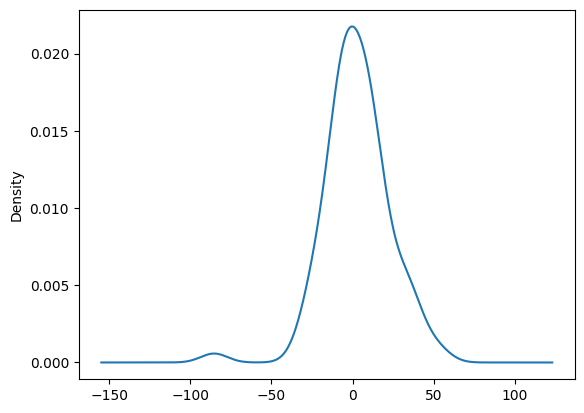

In [64]:
model_arima_fit_2.resid.plot(kind='kde')

In [65]:
test_data['Predicted_ARIMA_2']=pred_2

/var/folders/70/1761clss4h5_2mrwn8yvm5v80000gn/T/ipykernel_8720/2736493047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA_2']=pred_2


<Axes: xlabel='Month'>

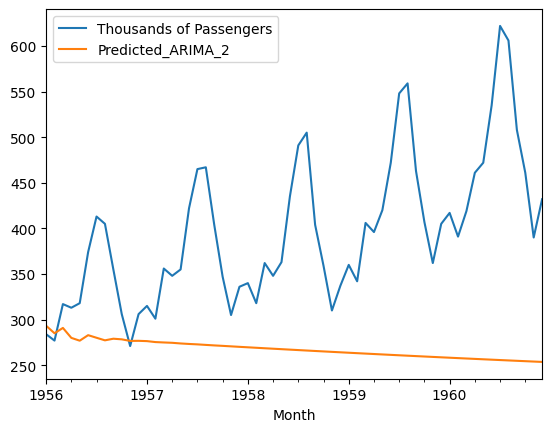

In [66]:
test_data[['Thousands of Passengers','Predicted_ARIMA_2']].plot()

### SARIMAX

In [67]:
model_arima__3=ARIMA(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))
                                                                #p  d q

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [69]:
model_arima_fit_3=model_arima__3.fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
model_arima_fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:           Thousands of Passengers   No. Observations:                   84
Model:             ARIMA(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                           Sun, 27 Aug 2023   AIC                            548.481
Time:                                   23:59:11   BIC                            568.971
Sample:                               01-01-1949   HQIC                           556.638
                                    - 12-01-1955                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5990      0.938      0.638      0.523      -1.240       2.438
ar.L2          0.8313      0.232      3.579      0.000       0.376       1.286
ar.L3         -0.4533      0.895     -0.507      0.612      -2.207       1.300
ma.L1          0.1831      1.166      0.157      0.875      -2.101       2.467
ma.L2         -0.5348      1.264     -0.423      0.672      -3.011       1.942
ma.L3         -0.0986      0.385     -0.256      0.798      -0.852       0.655
ma.L4         -0.1271      0.337     -0.377      0.706      -0.789       0.534
ma.L5          0.2471      0.357      0.692      0.489      -0.452       0.947
sigma2        87.7248     81.194      1.080      0.280     -71.413     246.863
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
pred_3=model_arima_fit_3.predict(start=pred_start_date,end=pred_end_date)
residuals_3=test_data['Thousands of Passengers']-pred_3

<Axes: ylabel='Density'>

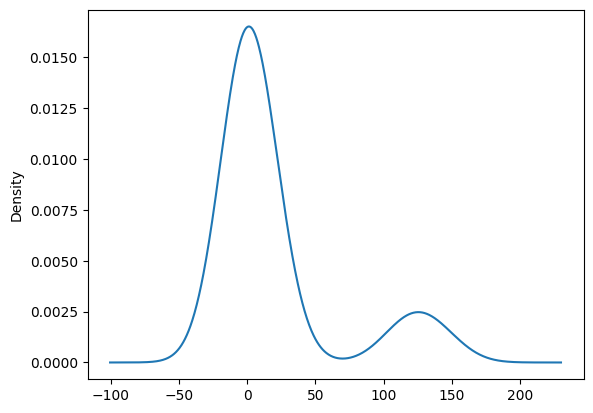

In [72]:
model_arima_fit_3.resid.plot(kind='kde')

In [73]:
test_data['Predicted_ARIMA_3']=pred_3

/var/folders/70/1761clss4h5_2mrwn8yvm5v80000gn/T/ipykernel_8720/2021610585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA_3']=pred_3


<Axes: xlabel='Month'>

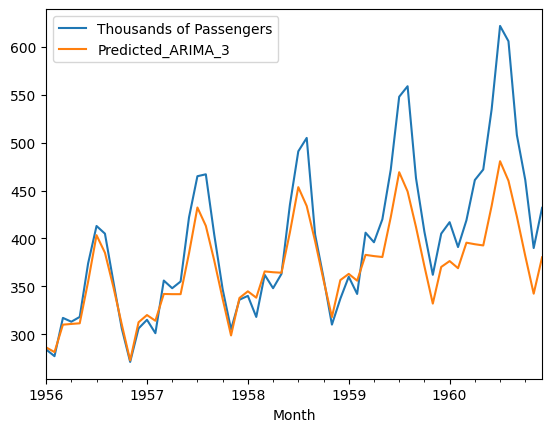

In [75]:
test_data[['Thousands of Passengers','Predicted_ARIMA_3']].plot()